![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 11: Image classification and segmentation

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/11_Image_classification_and_segmentation.ipynb)

**Resources:**


# Regarding the final project for the class

You will not have more assignements from now, you will only need to work on your final project. For that you will need to choose a topic and a group of people. Before the next session, you will need to:

* Choose a topic
* Choose a group of people

It doesn't need to be a super revolutionary idea, but at least have in mind the issue of reducing the time between information and action. And you will need to send it to me. 

The project will need to contain the following steps:

1. Ingesting, exploring and cleaning data for your project
2. Choosing/testing of algorithm approach
3. Visualizing the results
4. Packaging the project into a product

You will be using codes from class to support you on the second, third and forth parts of the project. 

I am not looking for excellence, and I do not mind that you copy/paste code, but always try to understand why. 

Afternoon sessions will be used to solve project issues.

# Classification, detection, segmentation...

Image classification can be understood as an identification process of what we have in the image. For that, different approaches with different skill levels can be used. From basically returning a text with the word "Cat" to returning, the bounding box where that cat is found, or multiple boxes for multiple entities or adjusting those boxes to the shape of the entity.

![alt text](https://miro.medium.com/max/2048/1*nR5QCdmqUnvU2JFBu2Xa-Q.png)

For this introductory class, we will only be looking at the first one, as the other ones involve more advanced techniques. 

![alt text](https://pbs.twimg.com/media/DWSo6n1W0AAPONY.jpg:large)



# Machine learning paths

The "learning" in machine learning can be performed over discrete datasets (classes) or over continuous (temperature, pricing of houses). And the learning can be done supervised or unsupervised.

![alt text](https://miro.medium.com/max/1600/1*ASYpFfDh7XnreU-ygqXonw.png)

![alt text](https://miro.medium.com/max/515/1*zWBYt9DQQEf_XxXWLA2tzQ.jpeg)

![alt text](https://vitalflux.com/wp-content/uploads/2018/02/Screen-Shot-2018-02-04-at-8.09.33-PM.png)

![alt text](https://qph.fs.quoracdn.net/main-qimg-47a80c548dc547be23f861a0bf909a98)

![alt text](https://miro.medium.com/max/4416/1*bvMhd_xpVxfJYoKXYp5hug.png)



# Image segmentation with scikit-image

Image Segmentation is essentially the process of partitioning a digital image into multiple segments to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.

[Here](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.random_walker) is the full list of segmentation algorithms available in scikit-image.

Segmentation algorithms available in `scikit-image`:

![alt text](https://miro.medium.com/max/1334/1*zKnOz-YWIKtIohhYcydNEQ.png)

## Unsupervised: thresholding

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
import skimage.io as io

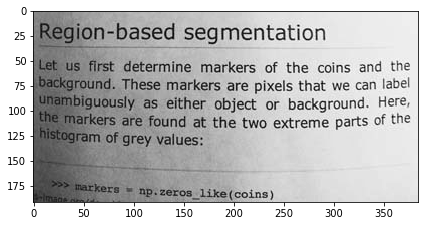

In [9]:
page = data.page()
io.imshow(page)

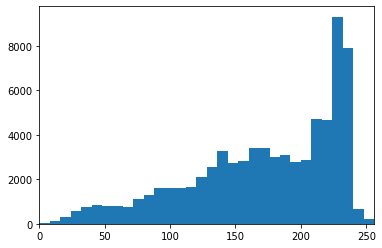

In [10]:
fig, ax = plt.subplots(1, 1)
ax.hist(page.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

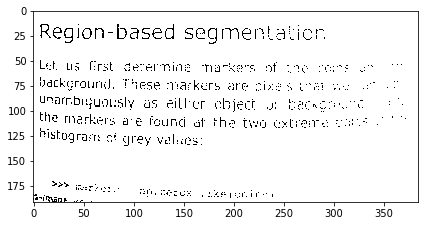

In [16]:
text_segmented = page > 50
io.imshow(text_segmented);

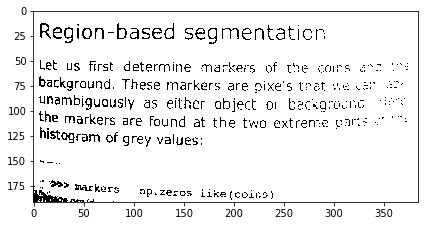

In [17]:
text_segmented = page > 70
io.imshow(text_segmented);

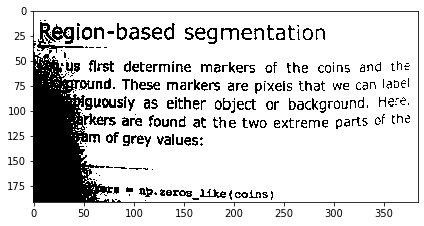

In [18]:
text_segmented = page > 120
io.imshow(text_segmented);

Scikit-image has a number of automatic thresholding methods, which require no input in choosing an optimal threshold. Some of the methods are: `otsu, li, local`.

In the case of `local`, we also need to specify the `block_size`. Offset helps to tune the image for better results.

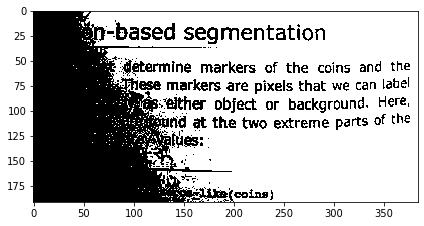

In [23]:
text_threshold = filters.threshold_otsu(page)
io.imshow(page > text_threshold);

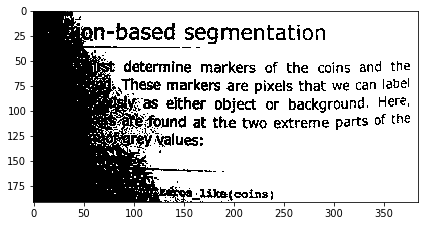

In [24]:
text_threshold = filters.threshold_li(page)
io.imshow(page > text_threshold);

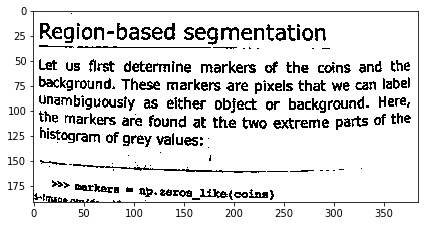

In [21]:
text_threshold = filters.threshold_local(page, block_size=51, offset=10) 
io.imshow(page > text_threshold);

## Supervised segmentation

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
import skimage.io as io

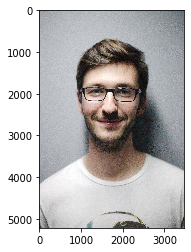

In [2]:
# import the image
image = io.imread('https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/adult-beard-boy.jpg') 
plt.imshow(image)

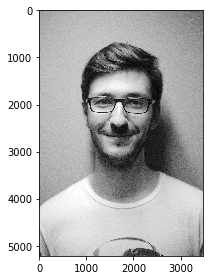

In [3]:
image_gray = color.rgb2gray(image) 
io.imshow(image_gray)

### Active Contour Segmentation or Snakes

This algorithm is initialized with the help of the user, by defining a countour or line around some object. The "snake" contracts starting by that countour, and is attracted or repelled by light and edges. 

In this example, we will draw a circle around someone's face, and try to segment the face.

In [0]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

The image is way too big for doing this for teaching purposes, so we will scale it down.

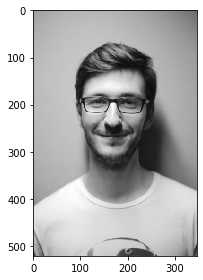

In [24]:
from skimage.transform import resize

image_resized = resize(image_gray, (image_gray.shape[0] // 10, image_gray.shape[1] // 10),
                       anti_aliasing=True)

io.imshow(image_resized)


In [0]:
# Exclude last point because a closed path should not have duplicate points
points = circle_points(resolution=200, center=[200, 170], radius=150)[:-1]

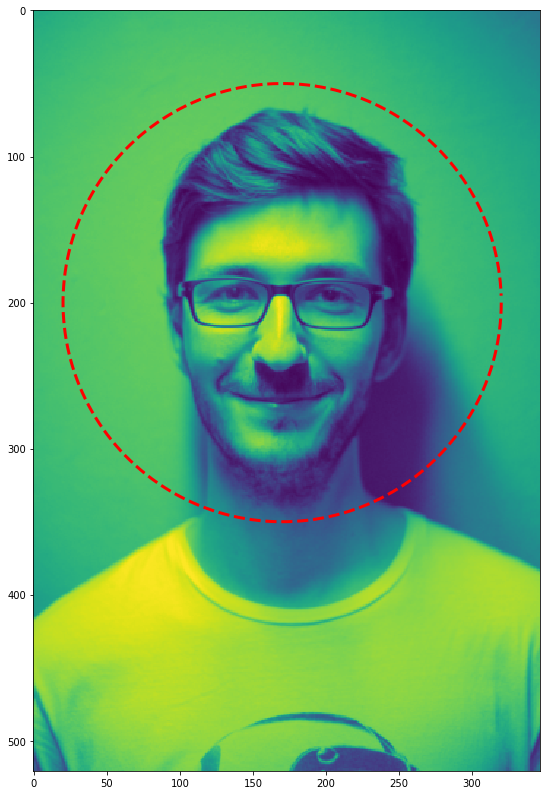

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.imshow(image_resized)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

In [0]:
# Using snakes
snake = seg.active_contour(image_resized, points)

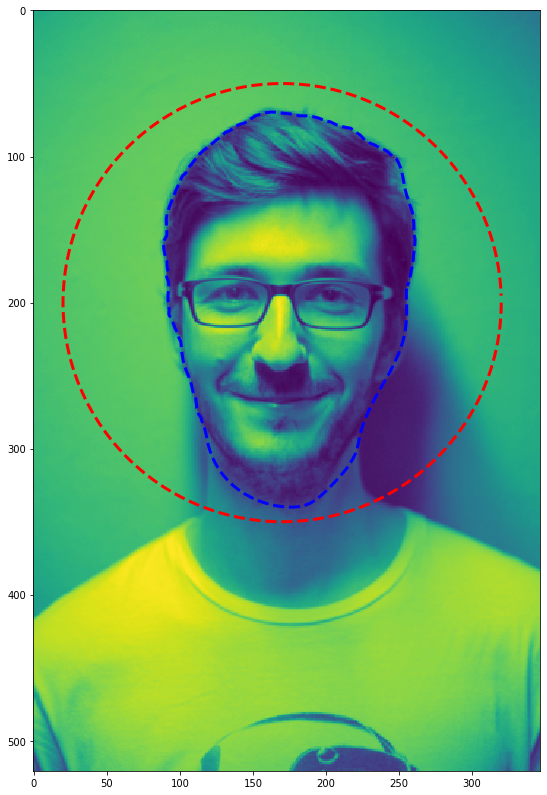

In [65]:
# Plotting snakes
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.imshow(image_resized)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '--b', lw=3)

We can tweak the parameters called alpha and beta. Higher values of alpha will make this snake contract faster while beta makes the snake smoother.

In [0]:
# Using snakes with  alpha and beta
snake = seg.active_contour(image_resized, points,alpha=0.01,beta=0.1)

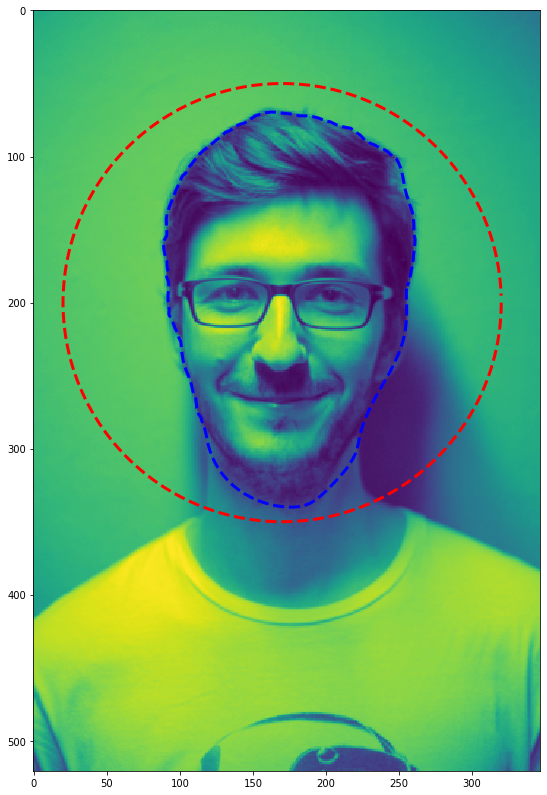

In [67]:
# Plotting snakes
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.imshow(image_resized)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '--b', lw=3)

#### Your turn

Take a picture of your colleague (against white background) and try to segment his/her face.

### Random walker segmentation

This method is also supervised because the user defines a couple of labels. Basically two labels are created and then the algorithm labels every unlabeled pixel. For every unlabelled pixel, this algorithm initializes a random walker that is free to go anywhere in the image (constrained by the 4-connected pixel grid). Probabilities are calculated for the random walker first touching each seed region. 𝑥 gets the label corresponding to the highest probability. 

**Source (original paper) [link text](https://ieeexplore.ieee.org/document/1704833)**

In [0]:
image_labels = np.zeros(image_resized.shape, dtype=np.uint8)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


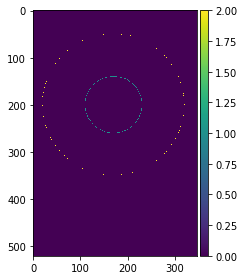

In [136]:
indices = draw.circle_perimeter(200, 170, 60)

#Label 1 (Face)
image_labels[indices] = 1

#Label 2 (Background)
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
io.imshow(image_labels);

In [0]:
image_segmented = seg.random_walker(image_resized, image_labels)

In [0]:
circle_inside = circle_points(resolution=200, center=[200, 170], radius=60)[:-1]

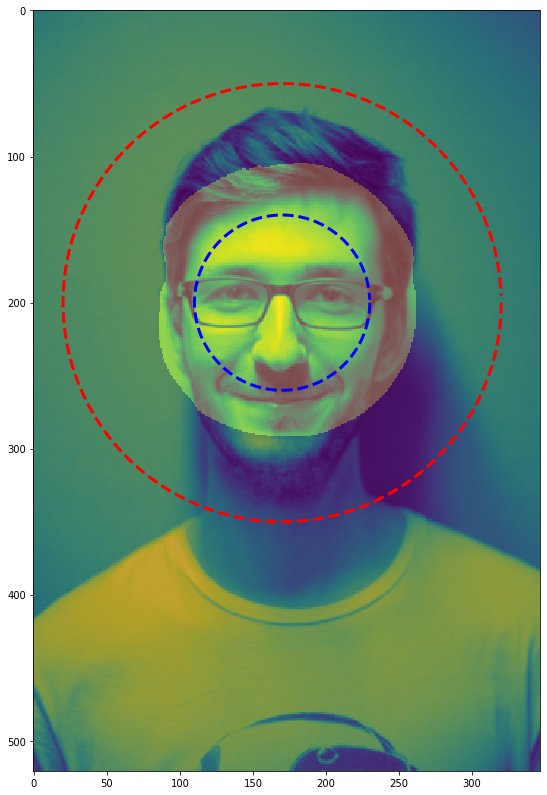

In [139]:
# Check our results
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.imshow(image_resized)
ax.imshow(image_segmented == 1, alpha=0.3)

ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(circle_inside[:, 0], circle_inside[:, 1], '--b', lw=3)

We can tune the beta parameter to fine tune the results. Beta is the penalization coefficient for the random walker motion (the greater beta, the more difficult the diffusion)

In [0]:
from skimage.filters import gaussian

image_segmented = seg.random_walker(gaussian(image_resized, 3), image_labels, beta = 5000)

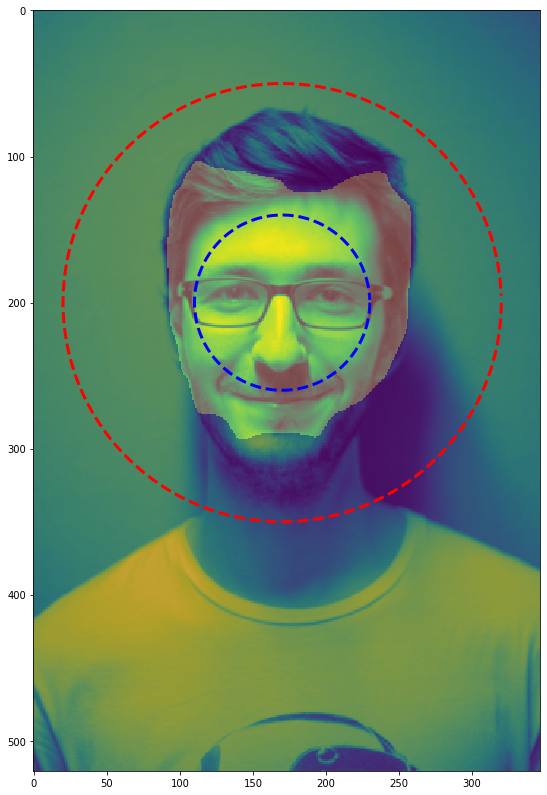

In [143]:
# Check our results
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.imshow(image_resized)
ax.imshow(image_segmented == 1, alpha=0.3)

ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(circle_inside[:, 0], circle_inside[:, 1], '--b', lw=3)

## Unsupervised segmentation

## SLIC (Simple Linear Iterative Clustering)

The SLIC algorithm uses K-Means, and separates the image in meaningful patches, defined by the number of segments. 

In [0]:
image_slic = seg.slic(image, n_segments=155)

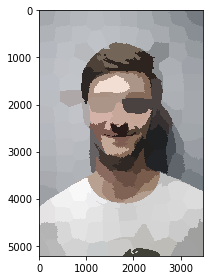

In [151]:
# label2rgb replaces each discrete label with the average interior color
io.imshow(color.label2rgb(image_slic, image, kind='avg'));

# Image classification with sklearn

## Image classifiers

This is a comparisson of different classifiers in sklearn over a synthetic dataset. 

This is to portray the decision boundaries at which the algorithm operates, but be careful, this is computed only over two dimensions, in high dimensionality, this can severely change. 

The training points are given in solid colors, while the testing are semi-transparent.

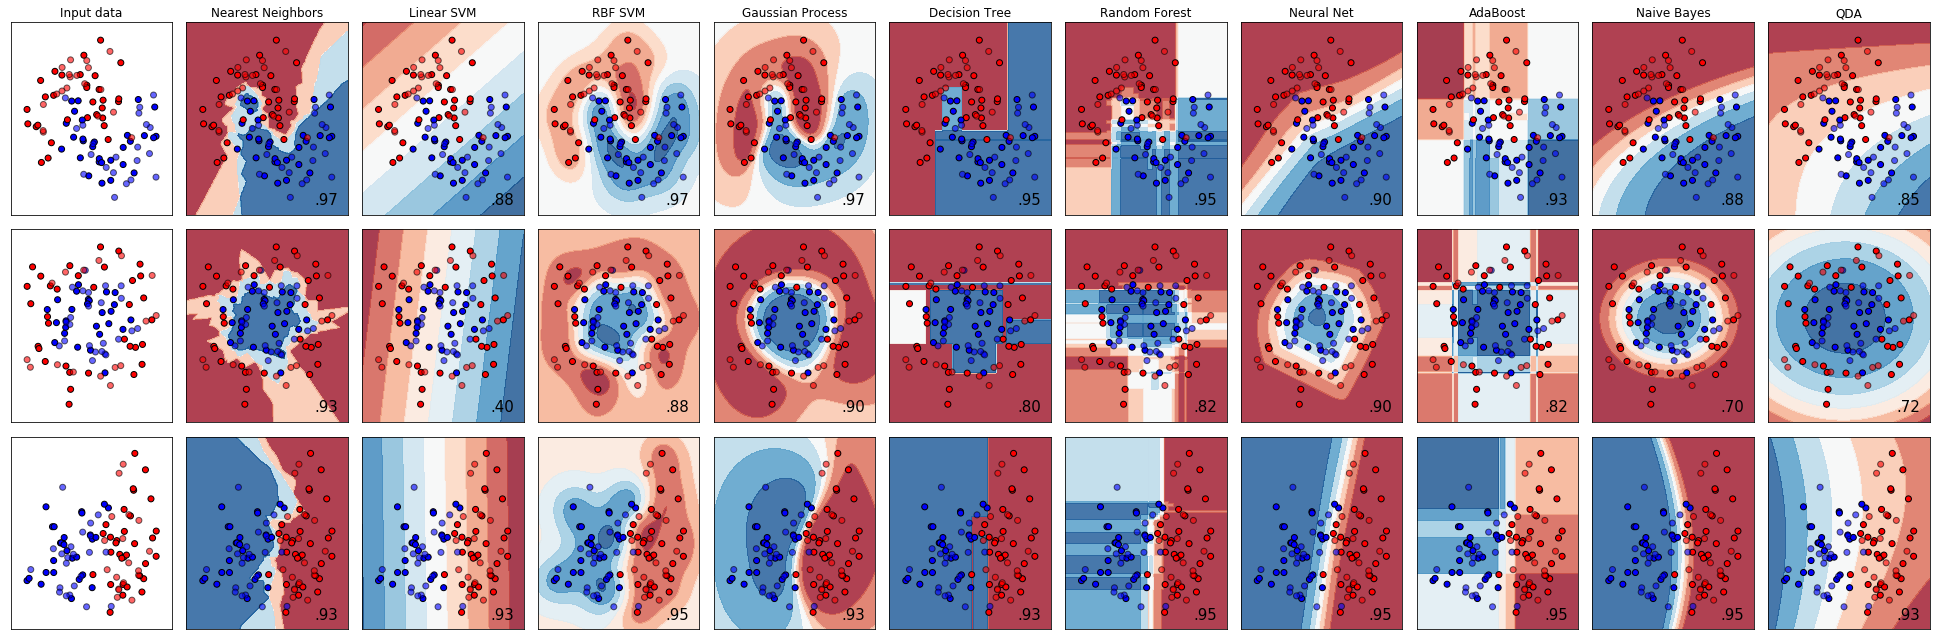

In [218]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Image classification: digits

Image classification can be performed with sklern using the algorithms above. We will try to classify a library of digits given by sklearn.

In [0]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

The digits dataset is made of 8x8 images of digits. For every image we have a "target" representing the number it is.

In [0]:
# The digits dataset
digits = datasets.load_digits()

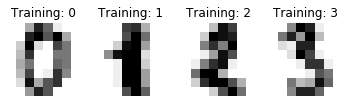

In [160]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

The classifier needs to be applied to a flattened image (we are not using convolutions), to turn the data into a (samples, feature) matrix.

In [177]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#1797 samples, 64 pixels (flattened )
print(data.shape)
print(target.shape)

(1797, 64)
(1797, 1)


We choose the classifier

In [0]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

Fit it to the first half of the digits

In [225]:
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Fit it to the second half of the digits

In [0]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [227]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97     

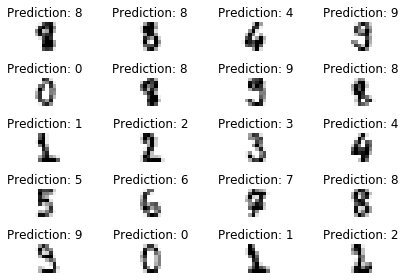

In [228]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:20]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.tight_layout()
plt.show()

## Your turn: 

Apply different classification algorithms to the digits

# Keras: from machine learning to deep learning

## Regression in sklearn

An example of a regression with sklearn

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


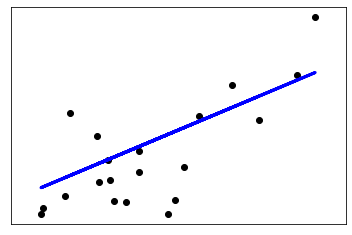

In [229]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Regression in Keras

An example of a regression with Keras. A Dense layer in Keras is a Fully connected one, like we saw in the other class. In this case, we will have only one neuron, producing a linear operation of the type Y=W*x + b

The "network" will try to learn those Weights and biases (coefficient)

In [264]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

import keras
from keras import models
from keras import layers

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Creating the Keras model with one neuron
model = models.Sequential()
model.add(layers.Dense(1, activation=None, input_shape=(1,)))

model.compile(optimizer=keras.optimizers.Adam(lr=0.01), 
              loss='mean_squared_error')

model.fit(diabetes_X_train, diabetes_y_train, epochs=50, batch_size=1)

Epoch 1/50
422/422 [==============================] - 1s 2ms/step - loss: 28881.8524
Epoch 2/50
422/422 [==============================] - 1s 2ms/step - loss: 27759.8295
Epoch 3/50
422/422 [==============================] - 1s 2ms/step - loss: 26688.4251
Epoch 4/50
422/422 [==============================] - 1s 2ms/step - loss: 25657.1214
Epoch 5/50
422/422 [==============================] - 1s 2ms/step - loss: 24661.7622
Epoch 6/50
422/422 [==============================] - 1s 2ms/step - loss: 23699.8704
Epoch 7/50
422/422 [==============================] - 1s 2ms/step - loss: 22770.5193
Epoch 8/50
422/422 [==============================] - 1s 2ms/step - loss: 21873.8625
Epoch 9/50
422/422 [==============================] - 1s 2ms/step - loss: 21010.6565
Epoch 10/50
422/422 [==============================] - 1s 2ms/step - loss: 20178.3025
Epoch 11/50
422/422 [==============================] - 1s 2ms/step - loss: 19378.3929
Epoch 12/50
422/422 [==============================] - 1s 2ms/s

In [265]:
diabetes_y_pred = model.predict(diabetes_X_test)
print(diabetes_y_pred)

[[136.49097]
 [128.46413]
 [131.92523]
 [128.39049]
 [128.83234]
 [131.55704]
 [137.22737]
 [128.90598]
 [127.28587]
 [129.05325]
 [134.9445 ]
 [127.06496]
 [131.26247]
 [129.56874]
 [126.10763]
 [132.51436]
 [130.08423]
 [130.08423]
 [133.83989]
 [126.18127]]


Coefficients: 
 131.17100524902344
Mean squared error: 4535.86
Variance score: 0.06


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


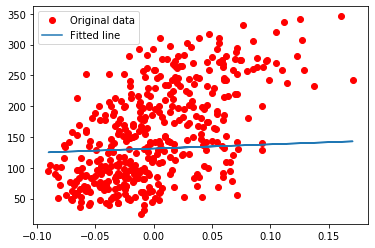

In [266]:
# Graphic display *after* training
W, b = [np.asscalar(v) for v in model.layers[0].get_weights()]

# The coefficients
print('Coefficients: \n', b)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


plt.plot(diabetes_X_train, diabetes_y_train, 'ro', label='Original data')
plt.plot(diabetes_X_train, W * diabetes_X_train + b, label='Fitted line')
plt.legend()
plt.show()

### Your turn - improving a linear regression

1. Try to use different regression parameters to get a better result in Keras.

## Image classification with CNNs

Inspired on Gregor Koehler's work

In [0]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

### Dataset loading

In [5]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


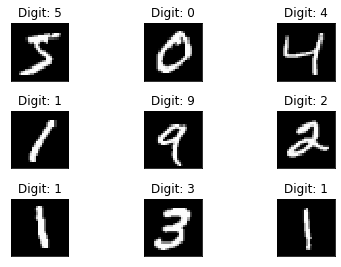

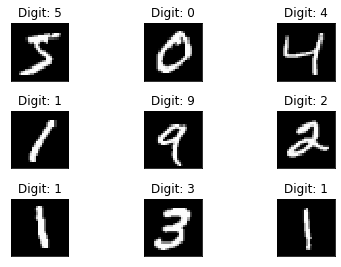

In [6]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

### Dataset normalization

In order to train our first neural network to classify images we first have to unroll the height width pixel format into one big vector - the input vector. Given that MNIST dataset images are 28 x 28, the final vector will be 784 in length. But let's see first the distribution of pixel values:

<function matplotlib.pyplot.show>

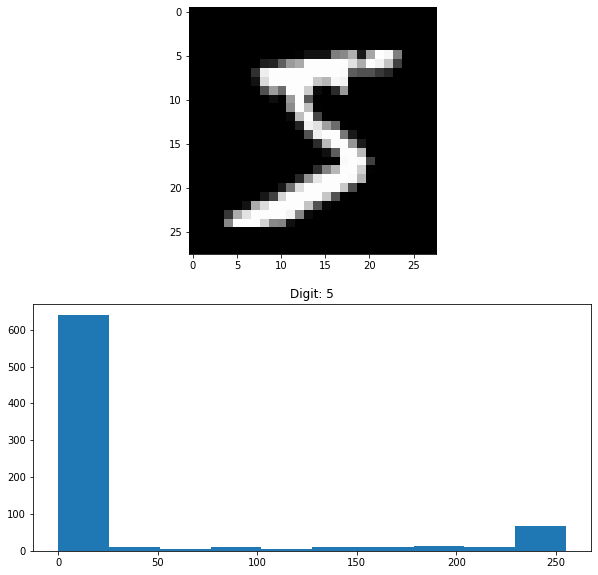

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.title("Digit: {}".format(y_train[0]))
ax[0].imshow(X_train[0], cmap='gray', interpolation='none')
ax[1].hist(X_train[0].reshape(784))
plt.show

Most of the pixels are close to 0, and very few at 255, which represents the digit.

Normalizing the input data helps to speed up the training, but also to reduce the chances of getting stuck at local minima, since we are using SGD to find the weights of the network.


In [8]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train_norm = X_train.reshape(60000, 784)
X_test_norm = X_test.reshape(10000, 784)
X_train_norm = X_train_norm.astype('float32')
X_test_norm = X_test_norm.astype('float32')

# normalizing the data to help with the training
# a /= b is equivalent to a = a / b
X_train_norm /= 255
X_test_norm /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train_norm.shape)
print("Test matrix shape", X_test_norm.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


Now we repeat the distribution test:

<function matplotlib.pyplot.show>

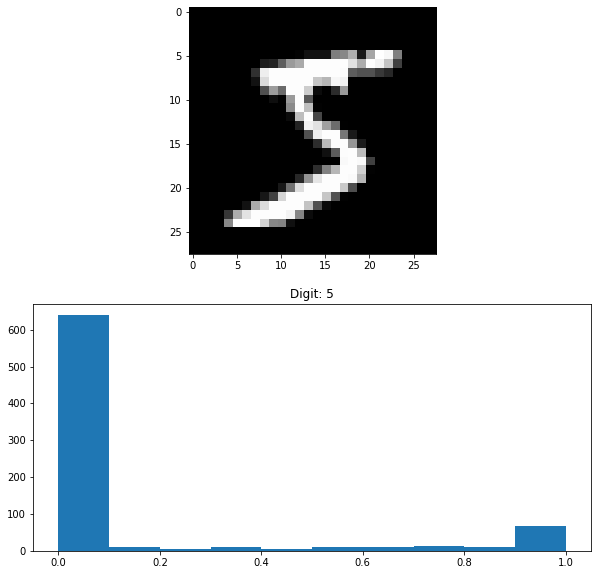

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.title("Digit: {}".format(y_train[0]))
ax[0].imshow(X_train[0], cmap='gray', interpolation='none')
ax[1].hist(X_train_norm[0])
plt.show

The distribution is the same, but the normalization will help on the neuron calculation. It is better to calculate from 0-1 than from 0-255.

So far, the ground truth "Y", still has the numbers from 0-9, so we will need to encode them:

### One-hot encoding

In [10]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


The categories need to be encoded, using the well-known one-hot encoding. The resulting vector has the same lenght as the number of categories.

So 2 will be represented as (0, 0, 1, 0, 0, 0, 0, 0, 0, 0)

In [11]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


### Network building

![alt text](https://nextjournal.com/data/1220CC01595BBCB08CCAC75AC0A373519699CFBC6FB7E6118A92DDB89EDB63490CFE?content-type=image%2Fpng&filename=text4298.png)

The input is our pixel vector flattened (remember 28x28 = 784). In this network we will provide two hidden layers consisting on 512 nodes each, which will be sufficient for recognizing the digits.

#### Softmax
The multi class classification at the end is controlled by a last fully connected layer of 10 different outputs. A softmax function is used to pump up the weights and get a list of probabilities:

![alt text](https://i.stack.imgur.com/0rewJ.png)

#### Input sizes and backprop
In Keras, we only need to specify the size of the input at the beginning and then the size of the matrices is inferred automatically. Also, the training with the backpropagation is ocurring without us having to implement anything.

#### Modified MLP
In order to modify and improve the MLP, activation functions are used to introduce non-linearity.

#### Regularization and overfitting prevention
To prevent overfiting we use dropout, where we randomnly drop some network weights, so that the network does not fully rely on few nodes.

![alt text](https://wiki.tum.de/download/attachments/23568252/Selection_532.png?version=1&modificationDate=1485021676870&api=v2)

[Good source for understanding Dropout](https://wiki.tum.de/display/lfdv/Dropout)

In [12]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Model compilation
In Keras, at the model compilation we can configure the learning process. 

We define here the loss or objective function, we will use categorical crossentropy but there are [others](https://keras.io/losses/) to choose from.

Regarding the optimizer, we can actually instantiate it before and then pass it to the compiler or just take one of the [availables](https://keras.io/optimizers/) and put it here. 

Regarding the metrics, we can choose which ones will be evaluated during training and testing. We can use any [list of metrics](https://keras.io/metrics/), or create some ourselves. 

In [13]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

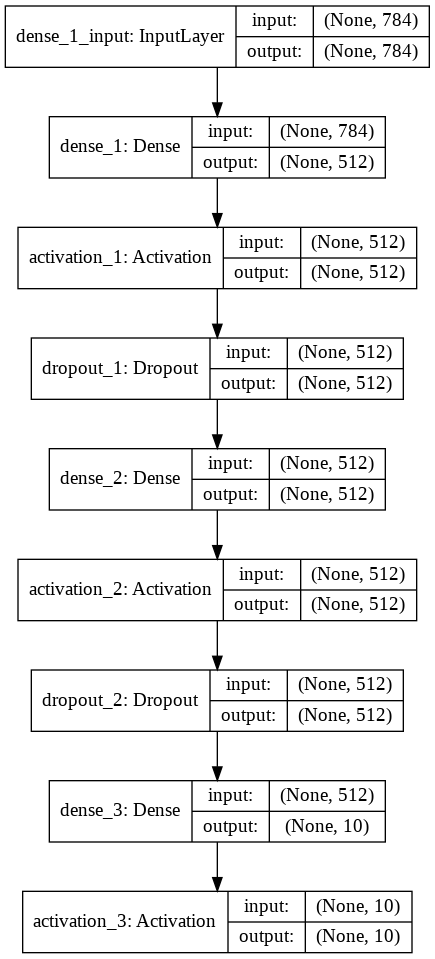

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

### Training

Now we can start training but first we need to define a couple of things:

*   Epochs: how many times we iterate over the whole training set
*   Batch size: how many samples do we need/want to update our model weights. Usually, the bigger the batch, the more stable our gradient descent will be, but there are some memory limitations.


We will be saving the history from the model training and the model itself, to use it later and to plot curves of loss and accuracy.

Notice that we are passing validation data, so that the model validates the weights in each epoch with the test set.

In [300]:
# training the model and saving metrics in history
history = model.fit(X_train_norm, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test_norm, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.2498 - acc: 0.9249 - val_loss: 0.1080 - val_acc: 0.9667
Epoch 2/20
 - 2s - loss: 0.0997 - acc: 0.9697 - val_loss: 0.0758 - val_acc: 0.9768
Epoch 3/20
 - 2s - loss: 0.0723 - acc: 0.9768 - val_loss: 0.0728 - val_acc: 0.9771
Epoch 4/20
 - 1s - loss: 0.0576 - acc: 0.9820 - val_loss: 0.0625 - val_acc: 0.9805
Epoch 5/20
 - 1s - loss: 0.0445 - acc: 0.9856 - val_loss: 0.0752 - val_acc: 0.9786
Epoch 6/20
 - 1s - loss: 0.0396 - acc: 0.9868 - val_loss: 0.0685 - val_acc: 0.9803
Epoch 7/20
 - 1s - loss: 0.0349 - acc: 0.9886 - val_loss: 0.0658 - val_acc: 0.9803
Epoch 8/20
 - 1s - loss: 0.0305 - acc: 0.9896 - val_loss: 0.0657 - val_acc: 0.9811
Epoch 9/20
 - 1s - loss: 0.0260 - acc: 0.9912 - val_loss: 0.0721 - val_acc: 0.9802
Epoch 10/20
 - 2s - loss: 0.0258 - acc: 0.9908 - val_loss: 0.0712 - val_acc: 0.9822
Epoch 11/20
 - 1s - loss:

In [302]:
# saving the model
import os 

save_dir = "./"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./keras_mnist.h5 


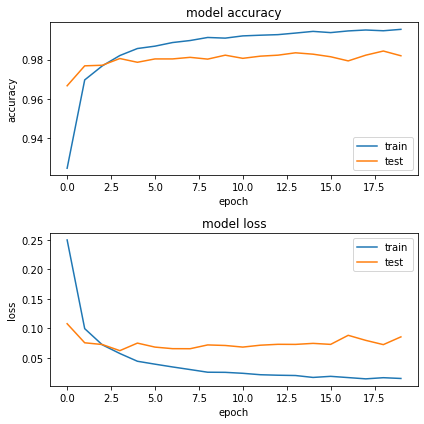

In [310]:
# plotting the metrics
fig = plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

### Evaluate model performance

In [312]:
mnist_model = load_model("/content/keras_mnist.h5")
loss_and_metrics = mnist_model.evaluate(X_test_norm, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.08577424848678493
Test Accuracy 0.9819


### Predictions on the test set




9819  classified correctly
181  classified incorrectly


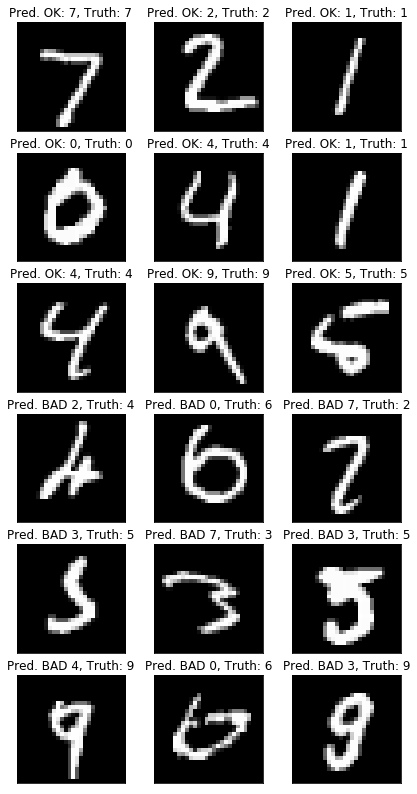

In [316]:
# load the model and create predictions on the test set
mnist_model = load_model("/content/keras_mnist.h5")
predicted_classes = mnist_model.predict_classes(X_test_norm)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Pred. OK: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Pred. BAD {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.show()

## Your turn:

Try to modify the network by changing the Dropout, batch size, epochs, or adding more hidden layers. 

## Image segmentation with CNNs

Probably no time to cover it in class, a good resource is [here](https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html)